In [18]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

We will be analysing sales data and answer the following questions:
Q: What was the best Year for sales? How much was earned that Year?
Q: What was the best month for sales? How much was earned that month?
Q: What City had the highest number of sales?
Q: What time should we display advertisement to maximize likelihood of customer's buying product?
Q: What products are most often sold together?
Q: What product sold the most? Why do you think it sold the most?

How Much Probability?
How much probability for next people will ordered USB-C Charging Cable?
How much probability for next people will ordered iPhone?
How much probability for next people will ordered Google Phone?
How much probability other peoples will ordered Wired Headphones?

In [19]:
df_sample = pd.read_csv('/kaggle/input/sales-product-data/Sales_April_2019.csv')
df_sample.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [20]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


In [21]:
months = ['January','February','March','April','May','June','July','August',
         'September','October','November','December']

In [22]:
dfs = [pd.read_csv(f'/kaggle/input/sales-product-data/Sales_{x}_2019.csv') for x in months]

In [6]:
print([x.isna().any(axis=1).sum() for x in dfs])
dfs = [x.dropna() for x in dfs]

[26, 32, 37, 59, 48, 43, 45, 28, 40, 62, 45, 80]


We have created a list of sales data month-wise so that we can analyse it conveniently

In [7]:
df = pd.DataFrame()
df['Month'] = months

df['#DataPoints'] = [len(dfi.index) for dfi in dfs]

df['TotalSales'] = [dfi.apply(lambda row: float(pd.to_numeric(row['Quantity Ordered'],errors='coerce'))*float(pd.to_numeric(row['Price Each'],errors='coerce')), 
                              axis = 1).sum() for dfi in dfs]


In [8]:
df_sorted = df.sort_values(by='TotalSales', ascending=False)
print(df_sorted)

        Month  #DataPoints  TotalSales
11   December        25037  4619297.12
9     October        20317  3736884.05
3       April        18324  3396059.11
10   November        17616  3198909.23
4         May        16587  3144584.80
2       March        15189  2809063.30
6        July        14326  2646899.69
5        June        13579  2578293.30
7      August        11983  2244412.31
1    February        12004  2203481.24
8   September        11646  2098816.70
0     January         9697  1815335.12


Text(0.5, 1.0, 'TotalSales vs Month')

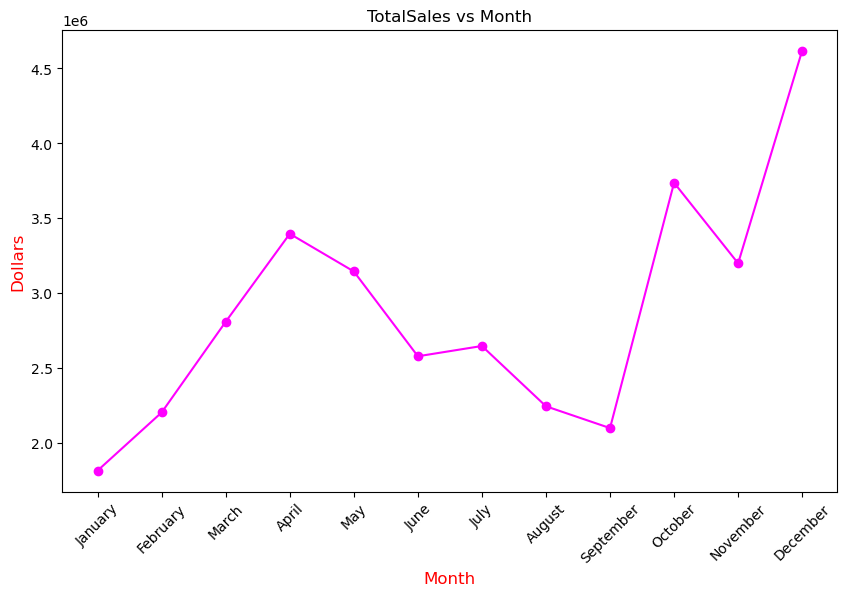

In [9]:
plt.figure(figsize=(10,6))
plt.plot(df['Month'],df['TotalSales'],color='magenta',marker='o')
plt.xticks(rotation=45)
plt.xlabel('Month',fontsize=12,color='red')
plt.ylabel('Dollars',fontsize=12,color='red')
plt.title('TotalSales vs Month')

We can clearly conclude that December has the highest sales which is 4619297.12

In [10]:
comb = {}
for dfi in dfs:
    dfi['City'] = dfi.apply(lambda x:x['Purchase Address'].split(',')[1] if len(x['Purchase Address'].split(',')) > 1 else 'Random',axis=1)
    comb = Counter(comb) + Counter(dfi['City'].value_counts().to_dict())

print(comb)

Counter({' San Francisco': 44732, ' Los Angeles': 29605, ' New York City': 24876, ' Boston': 19934, ' Atlanta': 14881, ' Dallas': 14820, ' Seattle': 14732, ' Portland': 12465, ' Austin': 9905, 'Random': 355})


Text(0.5, 1.0, 'Frequency vs City')

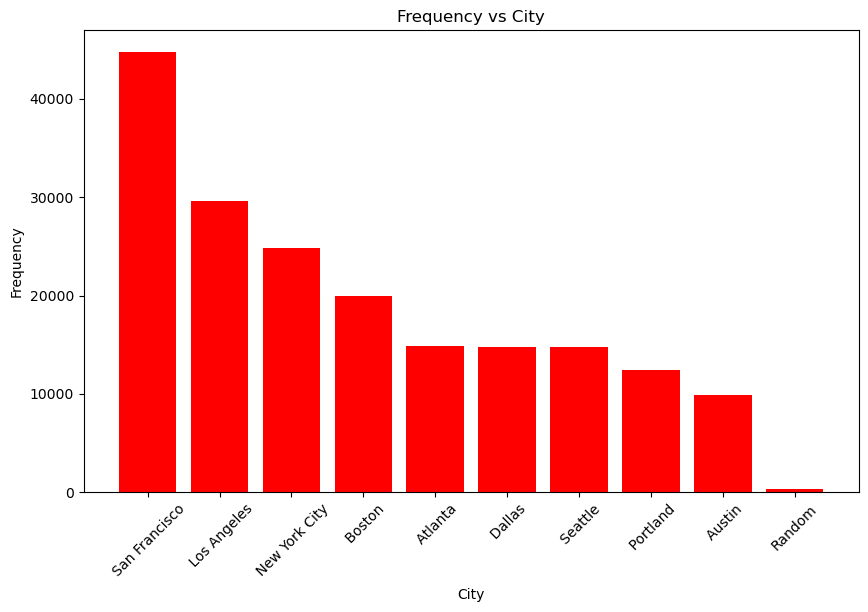

In [11]:
plt.figure(figsize=(10,6))
plt.bar(list(comb.keys()),list(comb.values()),color='red')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Frequency vs City')

We conclude that San Francisco has the highest number of sales which is 44732

In [12]:
cdf = pd.concat(dfs, ignore_index=True)
cdf = cdf[cdf['Order Date']!='Order Date']

cdf['Order Time'] = cdf.apply(lambda x:x['Order Date'].split()[1],axis=1)
cdf['Order Date'] = pd.to_datetime(cdf['Order Date'])
cdf['Order Time'] = pd.to_datetime(cdf['Order Time'])
cdf.sort_values(by='Order Date')
cdf['Quantity Ordered'] = pd.to_numeric(cdf['Quantity Ordered'])

In [13]:
bins = pd.date_range(start=cdf['Order Date'].min(), end=cdf['Order Date'].max(), freq='D')
cdf['Bin'] = pd.cut(cdf['Order Date'],bins=bins,labels=bins[:-1])
gdf = cdf.groupby('Bin')['Quantity Ordered'].sum().reset_index()

bins1 = pd.date_range(start=cdf['Order Time'].min(), end=cdf['Order Time'].max(), freq='H')
cdf['Bin1'] = pd.cut(cdf['Order Time'],bins=bins1,labels=bins1[:-1])
gdf1 = cdf.groupby('Bin1')['Quantity Ordered'].sum().reset_index()
gdf1.head()


,Bin1,Quantity Ordered
0,2023-09-08 00:00:00,4394
1,2023-09-08 01:00:00,2592
2,2023-09-08 02:00:00,1388
3,2023-09-08 03:00:00,922
4,2023-09-08 04:00:00,943


In [14]:
print(gdf1)

                  Bin1  Quantity Ordered
0  2023-09-08 00:00:00              4394
1  2023-09-08 01:00:00              2592
2  2023-09-08 02:00:00              1388
3  2023-09-08 03:00:00               922
4  2023-09-08 04:00:00               943
5  2023-09-08 05:00:00              1500
6  2023-09-08 06:00:00              2843
7  2023-09-08 07:00:00              4589
8  2023-09-08 08:00:00              7067
9  2023-09-08 09:00:00              9841
10 2023-09-08 10:00:00             12359
11 2023-09-08 11:00:00             14000
12 2023-09-08 12:00:00             14206
13 2023-09-08 13:00:00             13654
14 2023-09-08 14:00:00             12362
15 2023-09-08 15:00:00             11385
16 2023-09-08 16:00:00             11655
17 2023-09-08 17:00:00             12249
18 2023-09-08 18:00:00             13841
19 2023-09-08 19:00:00             14463
20 2023-09-08 20:00:00             13729
21 2023-09-08 21:00:00             12210
22 2023-09-08 22:00:00              9847


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200')])

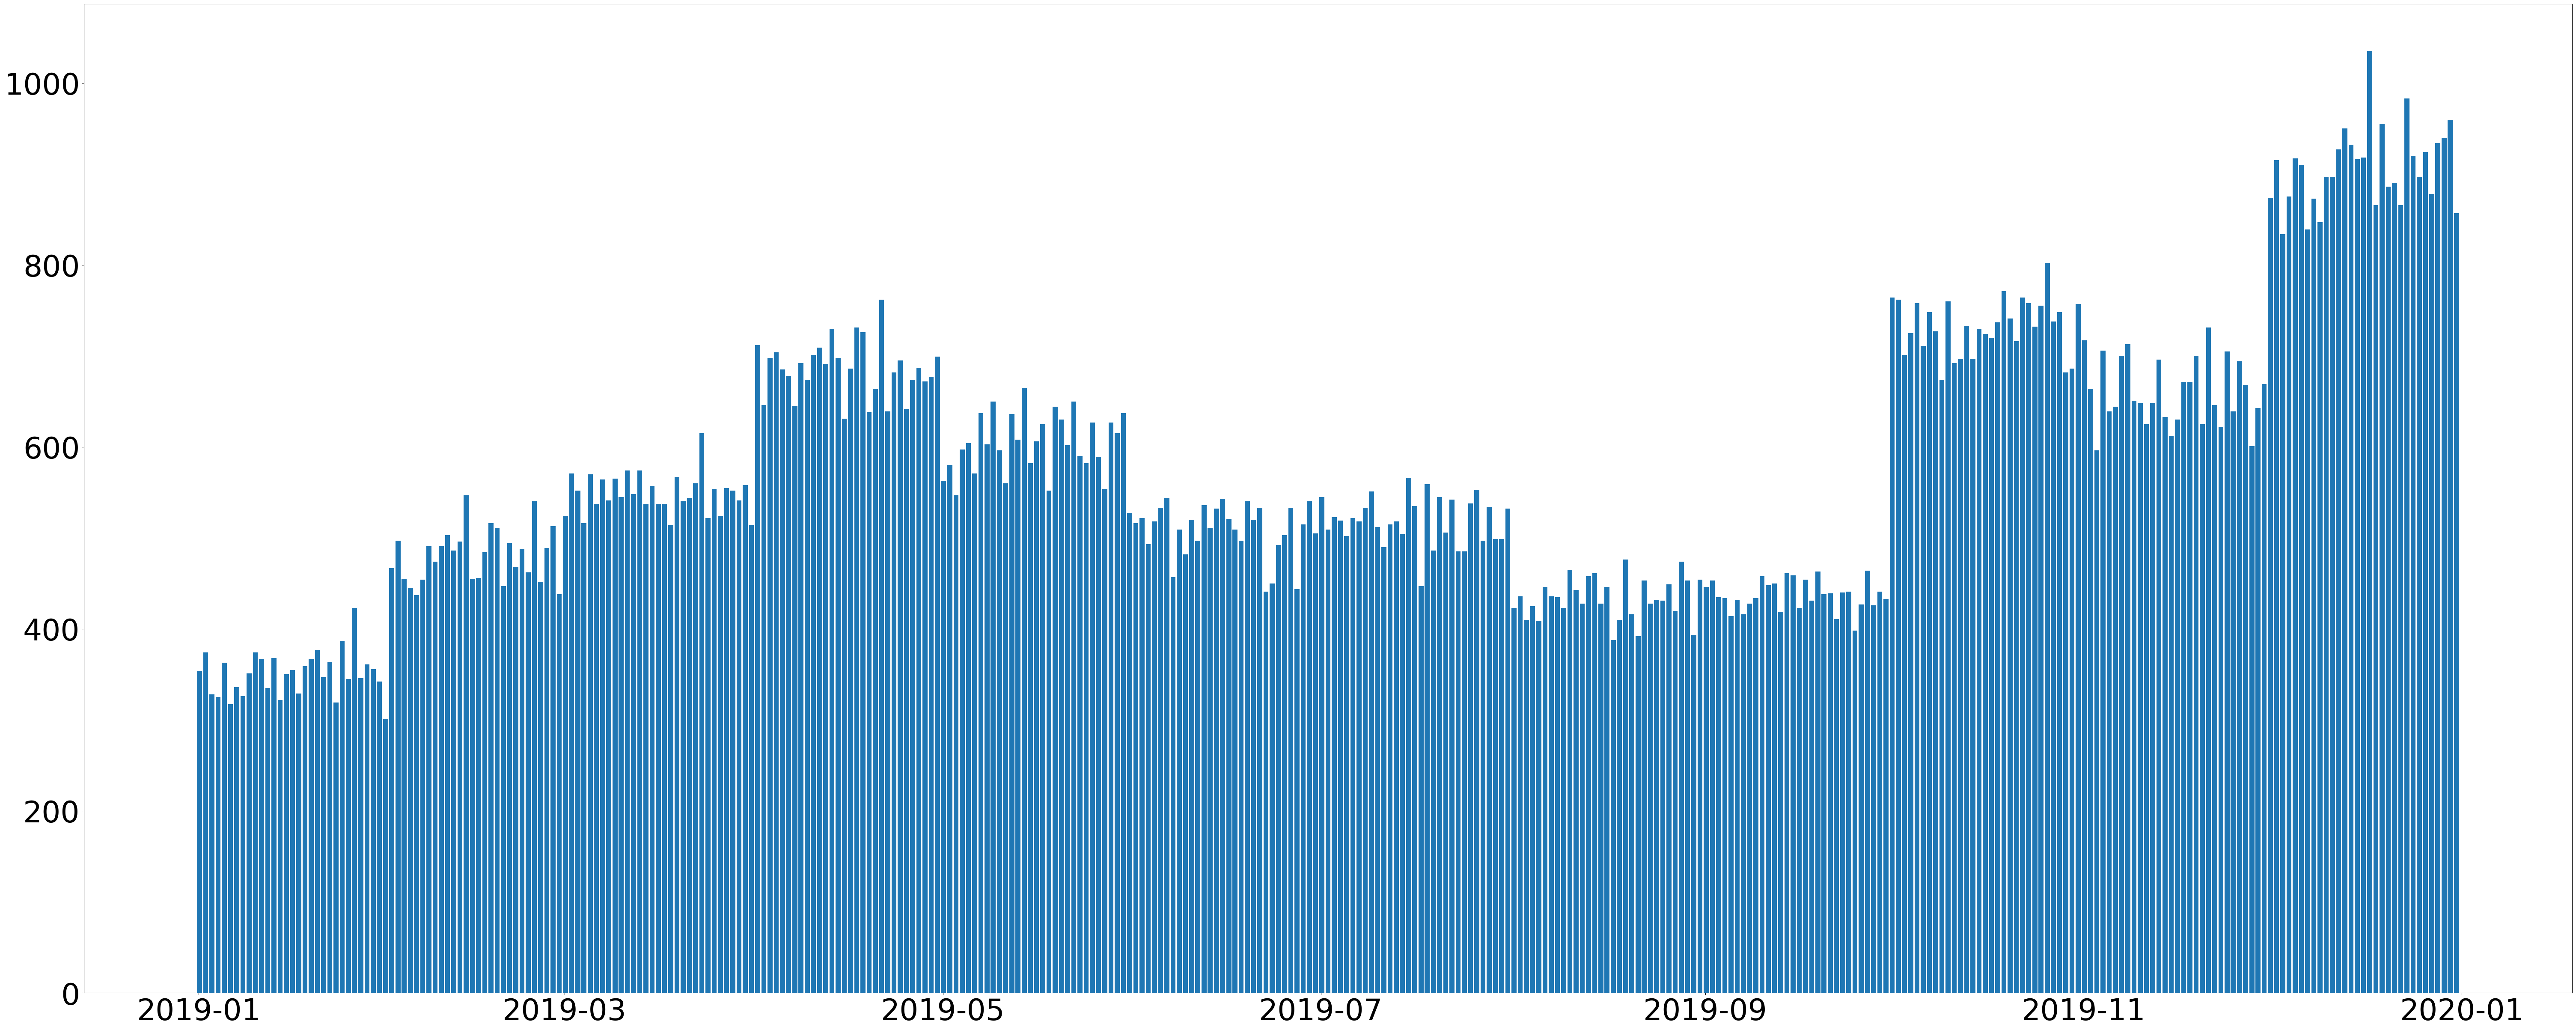

In [15]:
plt.figure(figsize=(75,30))
plt.bar(gdf['Bin'],gdf['Quantity Ordered'])
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)

Here, we can observe that the sales happen according to the month

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]),
 [Text(0, 0.0, '0'),
  Text(0, 2000.0, '2000'),
  Text(0, 4000.0, '4000'),
  Text(0, 6000.0, '6000'),
  Text(0, 8000.0, '8000'),
  Text(0, 10000.0, '10000'),
  Text(0, 12000.0, '12000'),
  Text(0, 14000.0, '14000'),
  Text(0, 16000.0, '16000')])

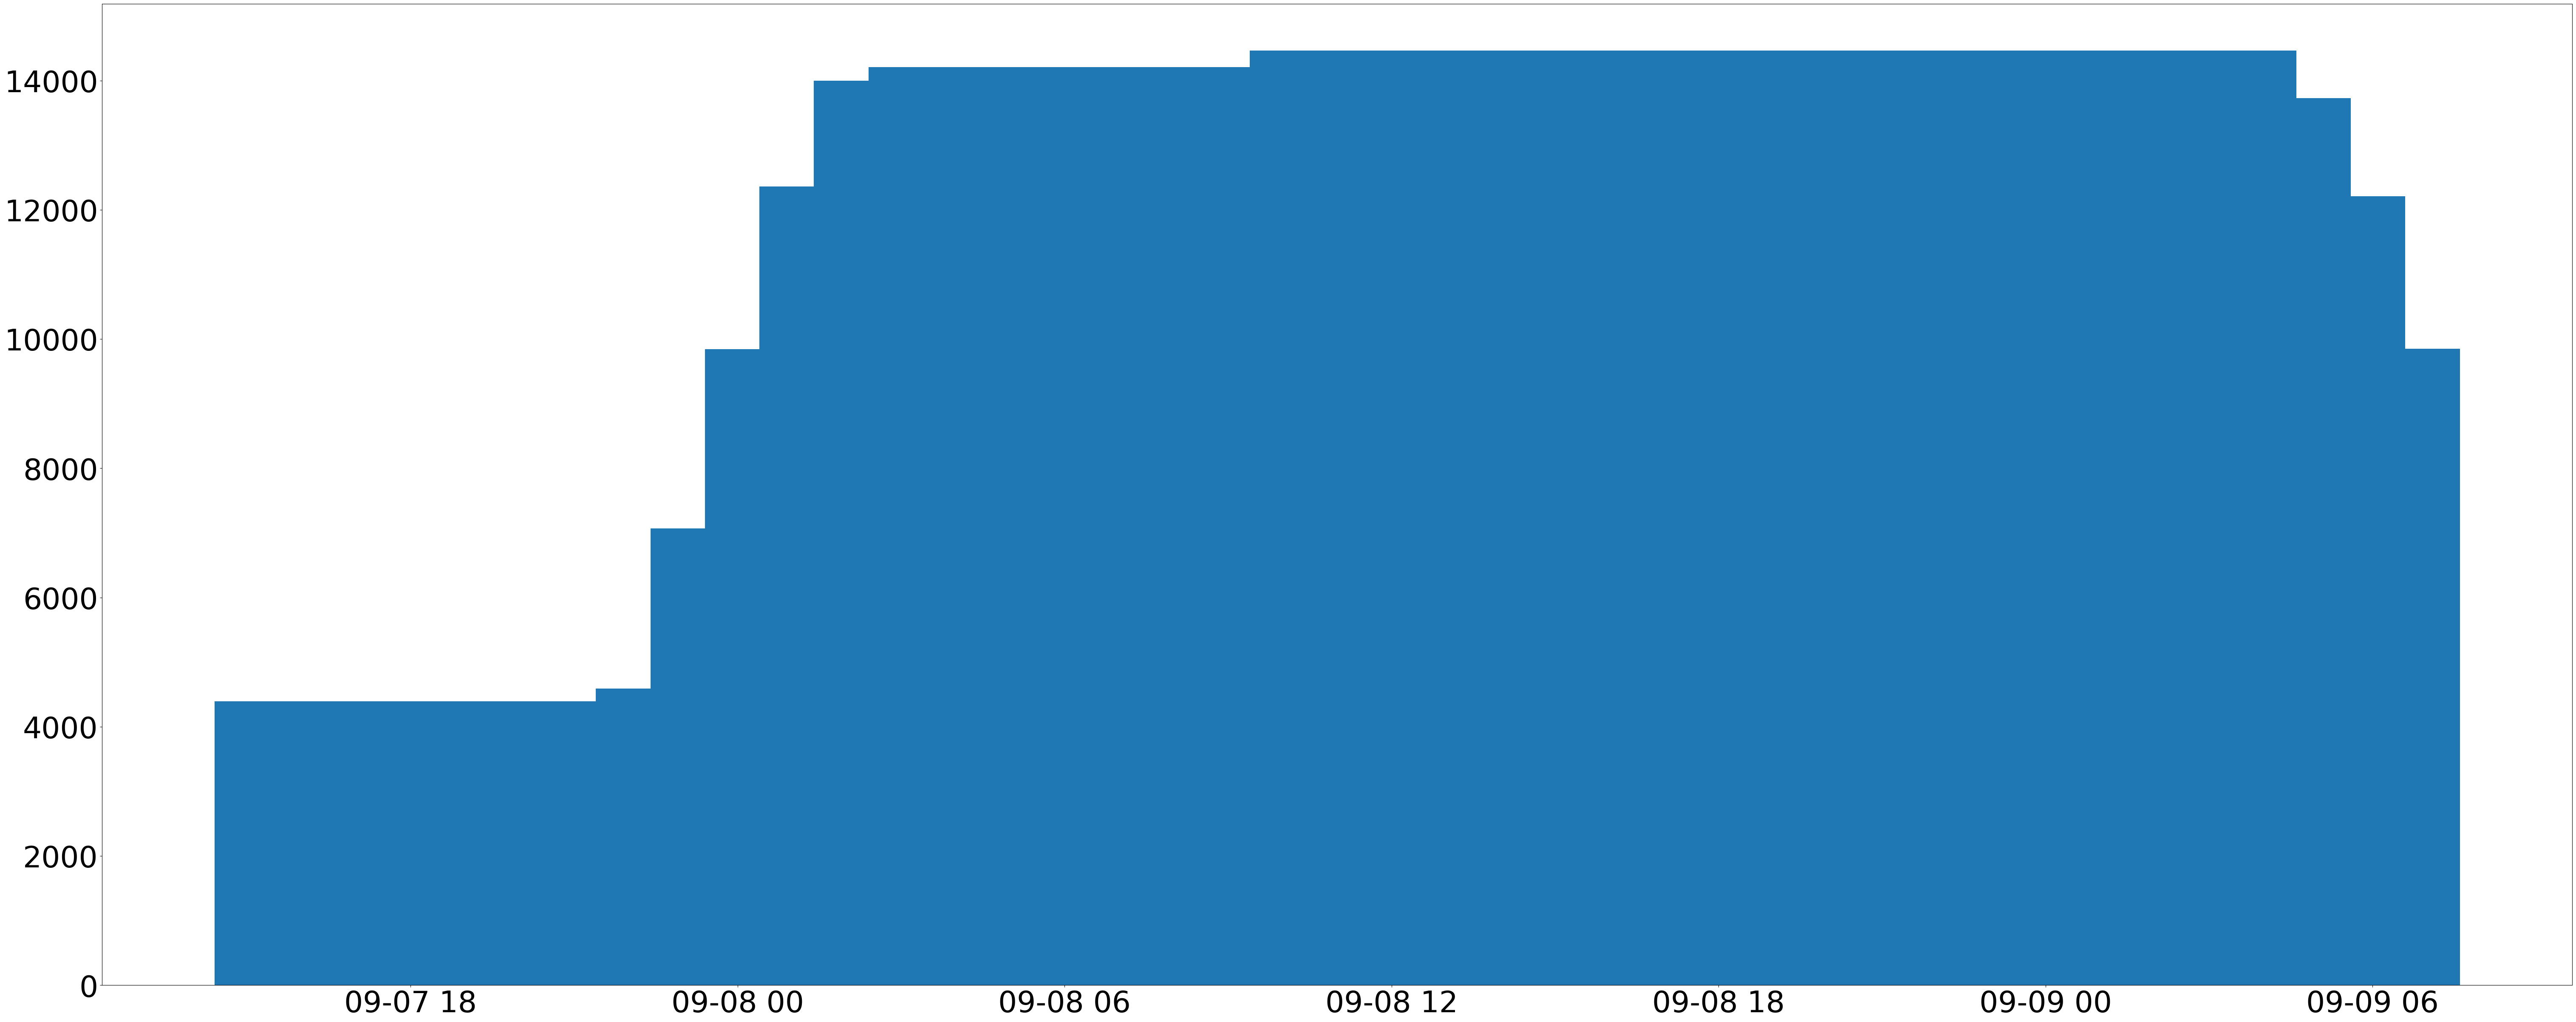

In [16]:
plt.figure(figsize=(75,30))
plt.bar(gdf1['Bin1'],gdf1['Quantity Ordered'])
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)

We can notice here that the main product buys were between 10AM to 9PM. Therefore, we can focus on ads between these hours
